**Assignment 2 Image captioning Digits**

Group-71


Name : 
Saurabh Arunrao Dhande - 2021FC04700

In [34]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

**Data Procession**

In [2]:
# Load MNIST dataset
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


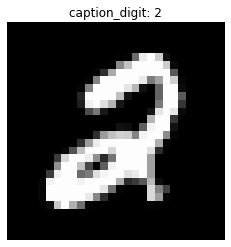

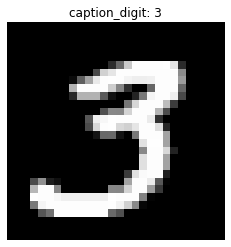

In [4]:
# Generate random indices for two samples
sample_1,sample_2  = np.random.randint(0, len(x_train), size=2)

# Plot the first sample
plt.figure()
plt.imshow(x_train[sample_1], cmap='gray')
plt.title("caption_digit: " + str(y_train[sample_1]))
plt.axis('off')

# Plot the second sample
plt.figure()
plt.imshow(x_train[sample_2], cmap='gray')
plt.title("caption_digit: " + str(y_train[sample_2]))
plt.axis('off')

plt.show()


In [5]:
#updating replacing inter with string of number in y_train and y_test
int_to_str = {
    0: 'zero',1: 'one',2: 'two',3: 'three',4: 'four',5: 'five',6: 'six',7: 'seven',8: 'eight',9: 'nine',
}

str_to_int = {v: k for k, v in int_to_str.items()}  # create new dictionary to map string labels to integer values

y_test = [int_to_str[num] if isinstance(num, int) else num for num in y_test]
y_train = [int_to_str[num] if isinstance(num, int) else num for num in y_train]

y_test = [str_to_int[label] if label in str_to_int else label for label in y_test]  # convert string labels back to integer values
y_train = [str_to_int[label] if label in str_to_int else label for label in y_train]  # convert string labels back to integer values

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train)
print(y_test)



[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# Reshape and normalize input data
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train = x_train / 255.0
x_test = x_test / 255.0

***Model Building***

layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)): This layer applies 32 filters of size 3x3 to the input image of size 28x28x1, and uses the ReLU activation function. The choice of 32 filters is a common default in many CNN architectures, and the use of ReLU activation helps introduce non-linearity into the model.

layers.MaxPooling2D(pool_size=(2, 2)): This layer performs max pooling on the output of the previous convolutional layer, reducing the spatial dimensions of the output by a factor of 2 in each dimension. This helps reduce the number of parameters in the model and introduces some degree of translation invariance.

layers.Reshape(target_shape=(5408,)): This layer reshapes the output of the previous layer into a 1D array of size 5408. This is required to feed the output to the next LSTM layer.

layers.RepeatVector(28): This layer repeats the output of the previous layer 28 times, which is necessary for feeding the data to the LSTM layer in a sequence format.

layers.LSTM(units=64, return_sequences=True): This layer applies an LSTM layer with 64 units and returns the output sequence. LSTMs are commonly used in sequence modeling tasks due to their ability to capture long-term dependencies.

layers.Flatten(): This layer flattens the output of the LSTM layer into a 1D array.

layers.Dense(units=10, activation='softmax'): This layer applies a dense layer with 10 units and a softmax activation function. The softmax function is commonly used for multi-class classification tasks to output probability scores for each class.

In [27]:
# Define CNN+LSTM model architecture
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Reshape(target_shape=(1600,)),
    layers.RepeatVector(28),
    layers.LSTM(units=64, return_sequences=True),
    layers.Flatten(),
    layers.Dense(units=10, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 reshape_1 (Reshape)         (None, 1600)              0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 28, 1600)        

***Model Compilation***

The choice of learning rate, optimizer, and loss function in a deep learning model plays a critical role in determining its performance. In the given code snippet, the Adam optimizer with a default learning rate of 0.001 is used, which is a commonly used optimizer for deep learning models. The choice of the categorical cross-entropy loss function is appropriate for multi-class classification problems. However, selecting the optimal values of these hyperparameters can be a challenging task and may require experimenting with different values. It is important to evaluate the performance of the model on a validation set to determine the best configuration for these hyperparameters to achieve optimal performance.

In [28]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

***Model Training***

In [29]:
# Train model
history = model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_test, y_test))

1875/1875 [==============================] - 278s 146ms/step - loss: 0.1147 - accuracy: 0.9638 - val_loss: 0.0438 - val_accuracy: 0.9868


Note : I used epoch = 1 while fitting model because when i am trying to use epoch > 1 then google colab is getting crashed, because of this I was not able to plot loss and accuracy history graphs for both train and validation set. 

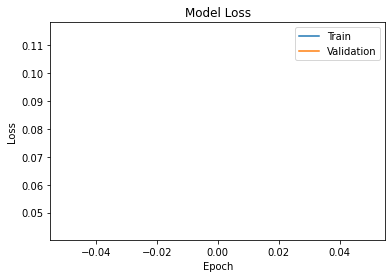

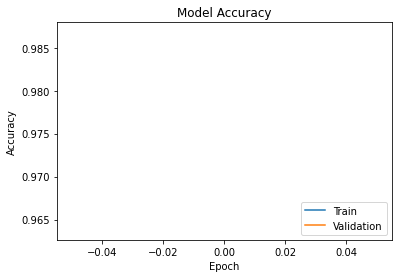

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

***Model Evaluation***

In [31]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 13s 41ms/step - loss: 0.0438 - accuracy: 0.9868
Test accuracy: 0.9868000149726868


In [32]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(x_test)

y_pred_binary = np.round(y_pred)

cm = multilabel_confusion_matrix(y_test, y_pred_binary)

print("Confusion matrix:")
print(cm)


313/313 [==============================] - 14s 42ms/step
Confusion matrix:
[[[9016    4]
  [  12  968]]

 [[8853   12]
  [   1 1134]]

 [[8920   48]
  [   0 1032]]

 [[8989    1]
  [  21  989]]

 [[9014    4]
  [  22  960]]

 [[9104    4]
  [  10  882]]

 [[9034    8]
  [   8  950]]

 [[8962   10]
  [  27 1001]]

 [[9017    9]
  [  26  948]]

 [[8975   16]
  [  20  989]]]


Take 5 random images from Google and generate caption for that image. 

In [49]:
import os
import cv2
import numpy as np
import tensorflow as tf

path = '/content/sample_data/Image'
data = []
labels = []

for filename in os.listdir(path):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(path, filename))
        img = cv2.resize(img, (28, 28))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        label = filename
        data.append(img)
        labels.append(label)

data = np.array(data)

labels = np.array(labels)
print(len(data))

data = np.expand_dims(data, axis=-1)

pred_t = model.predict(data)


5
1/1 [==============================] - 0s 35ms/step


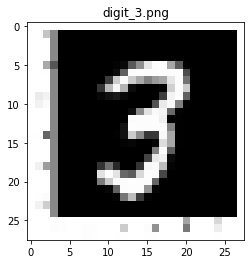

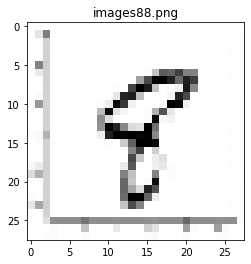

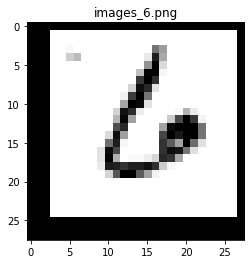

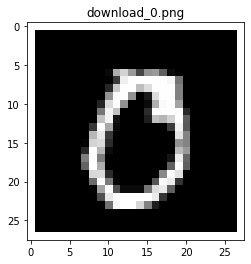

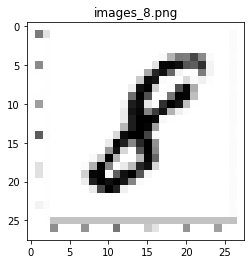

In [53]:
import matplotlib.pyplot as plt

for i in range(len(data)):
    plt.imshow(data[i], cmap='gray')
    plt.title(labels[i])
    plt.show()


In [50]:
print(pred_t)

[[2.3464945e-05 3.8579132e-03 2.9854311e-02 9.0560770e-01 1.1511862e-05
  8.1303615e-06 1.5556642e-06 6.0342986e-02 2.8964618e-05 2.6339572e-04]
 [2.1251183e-04 1.8848201e-03 1.4081442e-03 1.1803533e-03 1.1841732e-04
  1.7691224e-03 6.3419784e-03 5.0488070e-05 9.8580188e-01 1.2323017e-03]
 [6.7053122e-08 1.9968436e-06 3.6050689e-05 1.8143284e-07 3.8163711e-05
  1.3063962e-04 9.9945420e-01 1.1589938e-07 3.3847100e-04 6.9727669e-08]
 [9.8742861e-01 5.1744114e-06 7.3458930e-03 4.8356902e-05 2.0062951e-03
  3.9967944e-04 1.1707354e-04 1.9050970e-03 8.4908061e-06 7.3532667e-04]
 [8.1335020e-04 2.5657902e-04 3.0567318e-01 3.4225578e-04 6.6158280e-02
  2.0559282e-05 7.3542749e-04 1.2170168e-02 6.1160153e-01 2.2287061e-03]]


In [51]:
for a in range(0,len(pred_t)):
    for i in range(0,len(pred_t[a])):
      #print(a[i])
      if pred_t[a][i]>0.55:
        output_str = ""
        for char in int_to_str[i]:
          output_str += '"' + char + '", '
        # Remove the extra space and comma at the end of the string
        output_str = output_str[:-2]
        print(output_str)

"t", "h", "r", "e", "e"
"e", "i", "g", "h", "t"
"s", "i", "x"
"z", "e", "r", "o"
"e", "i", "g", "h", "t"
